In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import os
import datetime
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
path = r'/Users/mathuser/Documents/Perl Lab Rat Data/Bethany_Pasta'

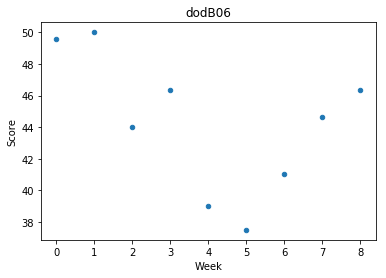

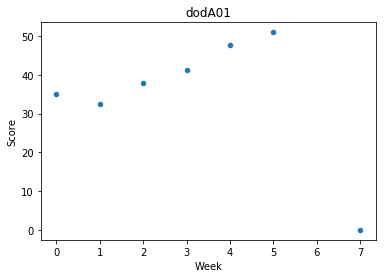

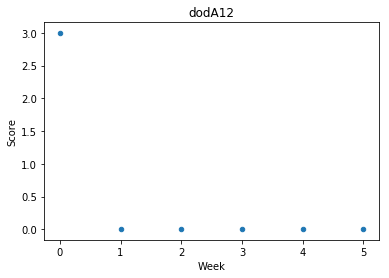

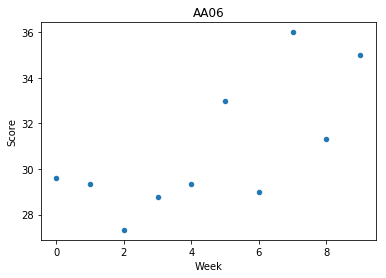

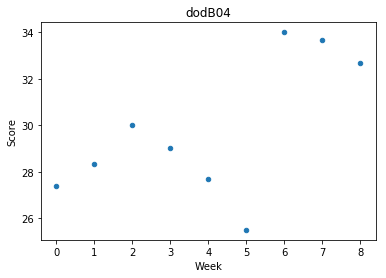

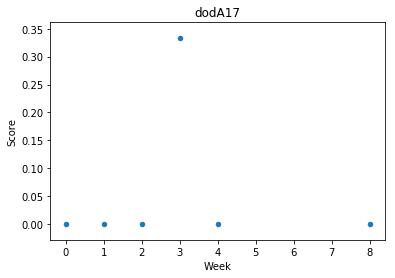

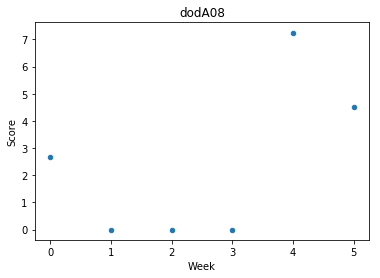

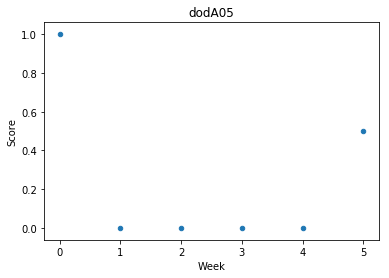

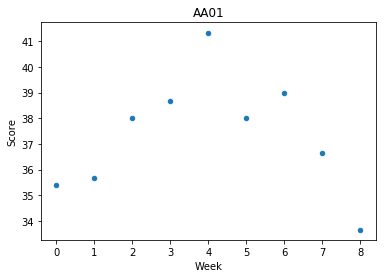

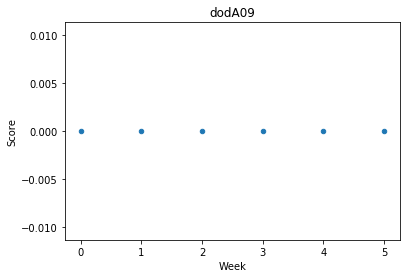

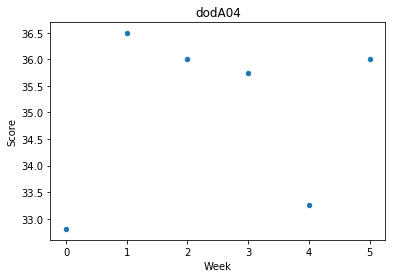

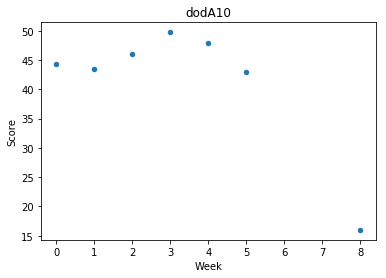

In [3]:
files = {}
for filename in os.listdir(path):
    if filename.startswith("."):
        continue
    subject_id = filename.split("_")[0]
    #bring in the csv, only take first 2 columns, delete rows with empty values
    df = pd.read_csv(path + "//"+ filename, header=None, names=["col0","col1"]).dropna(axis=0, how="any")
    #reshape dataframe so that score, date, time, and initial are columns
    df2 = pd.DataFrame(df["col1"].values.reshape(-1,4), columns=["Score","Date","Time ended", "Initial"])
    if subject_id in files.keys():
        files[subject_id] = files[subject_id].append(df2)
    else:
        files[subject_id] = df2
    #save as new CSV
    df2.to_csv("/Users/mathuser/Documents/Perl Lab Rat Data/reshape/"+ subject_id + "_reshaped.csv")
    df3=df2.assign(Delta="NaN")
    
    #find difference between days
    for x in range(len(df3)):
        df3.iloc[x,4]=(datetime.strptime(df2.iloc[x,1],"%m/%d/%y")-datetime.strptime(df2.iloc[0,1],"%m/%d/%y")).days
    #calculate week
    df3 = df3.assign(Week = "NaN")
    for x in range(len(df3)):
        df3.iloc[x,5] = int(df3.iloc[x,4]/5)
    #mean score of each week
    df4 = df3
    df4["Score"]=df4["Score"].astype("int")
    df4 = df3.groupby("Week",as_index=False)["Score"].mean()
    df4.to_csv("/Users/mathuser/Documents/Perl Lab Rat Data/pasta_mean/"+ subject_id + "_pasta_mean.csv")
    #make a scatter plot
    graph = df4.plot(kind="scatter", x="Week", y="Score",title = subject_id)
    fig = graph.get_figure()
    fig.savefig("/Users/mathuser/Documents/Perl Lab Rat Data/graphs/"+subject_id+"_plot.png")

'dodA10_Pasta.csv'